** Step - 1 : Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

**Step - 2 : Load Dataset**

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

**Step - 2 : extract indenpendent and dependent** 

In [7]:
X = digits.data # independent varibles
y = digits.target # dependent variables

In [8]:
X.shape, y.shape

((1797, 64), (1797,))

In [13]:
img = X[0:1]

In [16]:
reimg = img.reshape((8,8))

0


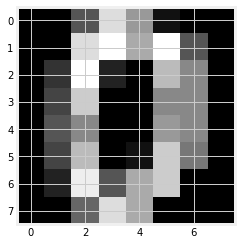

In [19]:
print(y[0])
plt.imshow(reimg, cmap = 'gray')
plt.show()

** Step -4 : Data Preprocessing **
    - missing values
    - categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label = LabelEncoder()

In [10]:
# y = label.fit_transform(y)

*Thresholding*

In [23]:
X[X>7] = X.max()
X[X<7] = X.min()

*Normalizing* -> bringing all values in 0-1

In [24]:
X = X / X.max()

** Step -5 : Spliting data into traning and testing sets**

In [26]:
from sklearn.cross_validation import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

** Step - 6: Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression(C = 10.0)
model.fit(x_train, y_train) # training 
y_pred = model.predict(x_test) # predicting

**Step -7 : Evaluating**

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

Text(17.06,0.5,'Predicted Values')

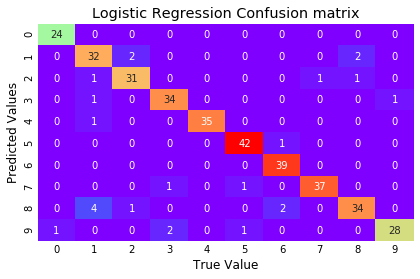

In [32]:
sns.heatmap(cm,annot=True,cbar=False, cmap = 'rainbow')
plt.title('Logistic Regression Confusion matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')

In [33]:
print(cr)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        24
          1       0.82      0.89      0.85        36
          2       0.91      0.91      0.91        34
          3       0.92      0.94      0.93        36
          4       1.00      0.97      0.99        36
          5       0.95      0.98      0.97        43
          6       0.93      1.00      0.96        39
          7       0.97      0.95      0.96        39
          8       0.92      0.83      0.87        41
          9       0.97      0.88      0.92        32

avg / total       0.93      0.93      0.93       360



**Testing**

In [34]:
import cv2

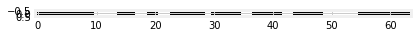

In [43]:
# Step 1 : Read image and convert into grayscale
img = cv2.imread('number2.jpg',0)
# Step 2: Thresholding image
ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# Step 3: Normalize it 
img_test = thresh/255.0
# Step 4: Resize it into 8 x 8
img_re = cv2.resize(img_test,(8,8))
# Step 5: Reshape image
test = img_re.reshape((1,64))
plt.imshow(test,cmap = 'gray')
plt.show()

In [44]:
model.predict(test)

array([2])

In [45]:
cap = cv2.VideoCapture(0)

while True:
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7),3)
    _,th3 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
    #th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,7)
    im2, contours, hierarchy = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    ix = np.where(np.array(areas) > 300)[0]
    result = np.array([1,0,0,0,0,0,0,0,0,0])
    for i in ix:
        cnt = contours[i]
        xr,yr,wr,hr = cv2.boundingRect(cnt)
        if xr< 20 :
            xr = 25


        if yr < 20:
            yr = 25


        cv2.rectangle(img,(xr-10,yr-10),(xr+wr+10,yr+hr+10), (0,255,0),2)
        roi = th3[yr-20:yr+hr+20, xr-20:xr+wr+20]
        
        roi_re=cv2.resize(roi,(8,8))
        g = roi_re.reshape(1,64).astype('float32')
        g = g/255
        
        result=  model.predict(g)
        #print(result)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Number: '+str(result),(xr-10,yr-10), font, 0.4, (255,0,0), 1, cv2.LINE_AA)


    cv2.imshow('Threshold',th3)
    cv2.imshow('orginal',img)

    if cv2.waitKey(41) & 0xff == ord('q'):
        break
        
    
    
cap.release()    
cv2.destroyAllWindows()

q -> to close`

In [46]:
from sklearn.externals import joblib

In [47]:
joblib.dump(model,'number_re.pkl')

['number_re.pkl']

In [48]:
(9*25000)

225000

In [49]:
225000*0.4

90000.0